In [49]:
# load libraries and scripts
#import JSON
using Plots
#using HDF5
#using Trapz
#using Statistics
include("../scripts/tools.jl")
include("../scripts/get_grid.jl")
include("../scripts/get_params.jl")
include("../scripts/stable.jl")
include("../scripts/dynamics.jl")
include("../scripts/disturbances.jl")

local_disturbance (generic function with 1 method)

In [99]:
#load borders
border, scale_factor = import_border("../data/borders/border.json")
#border = border
# create the lattice grid
dx = 0.01
Nx, Ny, xrange, yrange, isinside, isborder, n = get_grid(border, Float64(dx))
isgrid = isinside .| isborder
# define x and y coordinate for plotting
x = repeat(reshape(xrange,1,Nx), Ny, 1)
y = repeat(reshape(yrange,Ny,1), 1, Nx);
coord = Float64.(reshape([],0,2))
for j in 1:Nx
    for i in 1:Ny
        #if(isgrid[i,j])
        #    coord = [coord; reshape([yrange[i] xrange[j]], 1, 2)]
        #end
        coord = [coord; reshape([yrange[i] xrange[j]], 1, 2)]
    end
end
coord = Float64.(coord)
println(typeof(coord))
#vec(isborder')
scatter(coord[vec(isgrid),2],coord[vec(isgrid),1])

Matrix{Float64}


In [33]:
# compute or load grid parameters
include("../scripts/get_params.jl")
bx, by, p, m, d = get_params_diff_fast(isinside, n, Float64(dx), coord, scale_factor, "../data/disc/pantagruel.h5",
    "../numerics/grid_params_" * string(dx) * ".h5", Niter=5000, dmax = 0.01, patch=0.002, bmin=0.01, tau=1E6)

(8295,)
mmm
1.0e6
(3854, 2)
-0.384950144084045
-0.380302104124494
0.365049855915955
0.36165486162307353
-0.6033270799121987
-0.601370929629605
0.3866729200878013
0.3819475292025151
machin
done
Done with inertia.
 22.678638 seconds (385.42 k allocations: 29.884 GiB, 2.29% gc time)
2.824756593184539
till here it's fine
1.5116529539227486e-7


([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [100]:
v = local_disturbance_fast(coord[vec(isinside),:], [0.1; 0.1], 10.0, 0.05, dx)

13729-element Vector{Float64}:
 3.114879290809667e-55
 7.107074445276499e-55
 1.605452878205851e-54
 3.5905527932568565e-54
 7.59460406167168e-52
 1.5679251713206508e-51
 3.2048121803658556e-51
 6.48540180349624e-51
 1.2993562765277393e-50
 1.2526476952385823e-54
 2.858107680137669e-54
 6.456323535978877e-54
 1.4439396397722598e-53
 ⋮
 4.934424050512058e-7
 6.76076633741726e-7
 9.170910158978651e-7
 1.2316463009348728e-6
 1.637633183513428e-6
 3.829715073094747e-7
 5.194969196828586e-7
 6.976804356196105e-7
 9.276564481146355e-7
 2.9134701291122914e-7
 3.912768356903226e-7
 5.202532005984452e-7

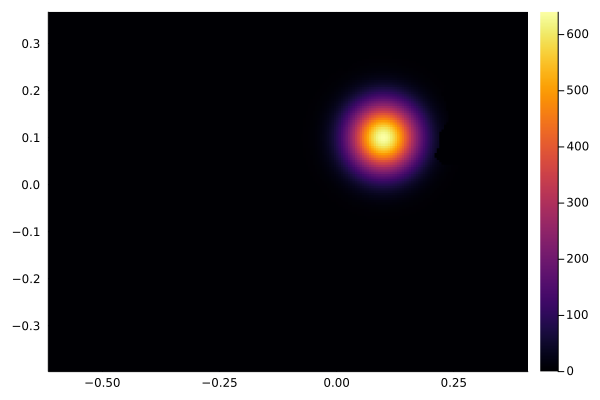

In [101]:
v2 = zeros(Nx * Ny)
#println(size(v2))
#println(size(isinside))
#println(size(v))
#println(sum(isinside))
v2[vec(isinside)] .= v 
heatmap(xrange, yrange, reshape(v2, Ny, Nx))400000.0

In [112]:
include("../scripts/get_params.jl")
v3 = heat_diff_fast( vec(isinside), n, v2, Ny, Nx, Niter = 2, tau = 50.0)

machin
machin
done


31365-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

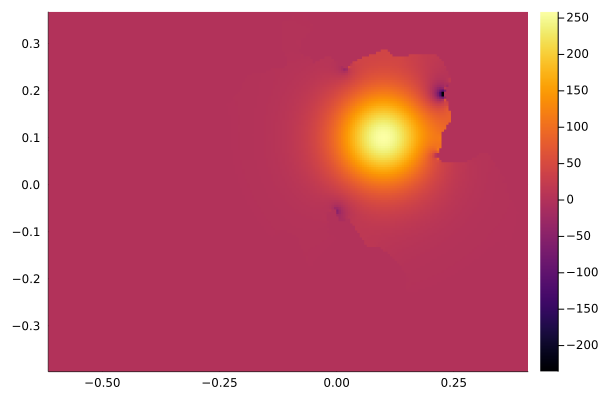

In [113]:
heatmap(xrange, yrange, reshape(v3, Ny, Nx))

In [109]:
println(sum(v2))
println(sum(v3))

400000.0
NaN


0.9685241661271435